Programación para la ciencia de datos
============================

--- 

Caso de ejemplo: Análisis de la estructura a gran escala del Universo
-----------------------------------------------------

---


In [18]:
import pandas as pd
import os
from scipy.integrate import quad
base_folder = os.getenv('PROJECT_TFM')
print(base_folder+'\\data\\2dfgrs-valid.csv')
data = pd.read_csv(base_folder+'\\data\\2dfgrs\\2dfgrs-valid.csv')
data

C:\desarrollo\git\uoc\tfm\data\2dfgrs-valid.csv


,GAL_ID,ra,dec,x,y,z,redshift,dist,GROUP_ID
0,2,3.627292,-32.966861,0.099988,0.006339,-0.064981,0.1229,0.119417,12097
1,3,3.586292,-32.388000,0.085393,0.005352,-0.054273,0.1038,0.101322,542
2,5,3.608000,-32.711528,0.084924,0.005355,-0.054652,0.1036,0.101132,4846
3,6,3.612542,-32.862444,0.106340,0.006714,-0.068832,0.1308,0.126850,4847
4,7,3.613417,-33.013278,0.089646,0.005661,-0.058362,0.1099,0.107120,1462
...,...,...,...,...,...,...,...,...,...
104907,332683,218.192917,-2.104833,-0.043573,-0.034280,-0.002038,0.0562,0.055478,12096
104908,332688,218.184250,-2.088833,-0.043808,-0.034454,-0.002033,0.0565,0.055770,12096
104909,332689,218.172000,-2.404389,-0.091945,-0.072281,-0.004911,0.1204,0.117058,78706
104910,332691,218.189667,-2.685111,-0.031195,-0.024539,-0.001861,0.0401,0.039733,78707


In [19]:
import math


def parse_megaparsecs(d):
    return d * 977.8 /3.262
    

def calculate_distance(redshift):
    i = quad(integrand, 0, redshift, args=())
    return i


def integrand(x):
    OMr = 0.0001
    OMm = 0.3
    OMv = 0.7
    return 1/(math.sqrt(OMr * (1+x)**4 + OMm * (1+x)**3 + OMv))    

In [20]:
calculate_distance(0.15)

(0.1447928113503783, 1.607523129613967e-15)

In [21]:
min_redsifth = 0.0
max_redsifth = 0.3
ra_min = 0.0
ra_sup = 30
dec_min = -30.0
dec_sup = -27.0

data_sample = data[(data['ra'] <= ra_sup) & (data['ra'] >= ra_min) 
                & (data['dec'] >= dec_min) & (data['dec'] <= dec_sup)
                & (data['redshift'] >= min_redsifth) & (data['redshift'] <= max_redsifth)]
data_sample.shape

(6677, 9)

In [22]:
data = data_sample

In [23]:
def change_distances(dist):
    ''' parse h-1MP distances to MP distances'''
    return dist * 977.8 * 1000 /(70*3.262)

In [24]:
maxDist = max(data['dist'])
maxDist

0.1906879803183277

In [25]:
# Podemos hacer el ejercicio usando las funciones de numpy
import numpy as np
import matplotlib.pyplot as plt
import math

# Para cada diferencial de volumen queremos el mismo número de galaxias.
# dV = d(ro^3/3)d(sin(dec))d(ra)  --> para angúlos pequeños sin(dec) ~ dec

def ro_t(x):
    """ returns the result of x^3/3 """
    return (x**2)

# definimos función para generar el catálogo simulado
def to_radians(angle):
    return angle * math.pi / 180

def simulateCatalog(limits, n_gal, plotRho = False):
    """A simulated catalogue of n_gal galaxies is returned in the given limits
    
       Args:
         limits: (:obj:`dict`): with keys "Dist_min", "Dist_max", "dec_min","dec_max","ra_min","ra_max"
         n_gal:  (:obj:`int`)
         
       Optional Args:
         plotRho: (:obj:`boolean`): Returns plot to see distribution of rho. 
                  
       Retruns:
         pos_cat: (:obj:`numpy array` with shape n_gal x 3): position in cartesian coordinates of the n_gal galaxies
    
    """
    if not isinstance(limits, dict):
        print('Input must by a dictionary')
        return False
    else:
        if "min_redsifth" not in limits or "max_redsifth" not in limits:
             raise AssertionError('Max_redsifth and min_redsifth keys must be given')
        if "dec_min" not in limits or  "dec_max" not in limits:
             raise AssertionError('dec_min and dec_max keys must be given')
        if "ra_min" not in limits or "ra_max" not in limits:
             raise AssertionError('ra_min and ra_max keys must be given')
            
        dist_min = 0 #calculate_distance(limits["min_redsifth"])[0]
        dist_max =  maxDist# calculate_distance(limits["max_redsifth"])[0]
        # Generem nombres aleatoris uniformes, amb els límits imposats 
        # i el mateix número de galàxies que el catàleg real
        
        ro3 = np.random.uniform(low=ro_t(dist_min),
                        high=ro_t(dist_max), size=n_gal)  
        dec = np.random.uniform(low=limits["dec_min"],
                        high=limits["dec_max"], size=n_gal)
        ra = np.random.uniform(low=limits["ra_min"],
                        high=limits["ra_max"], size=n_gal)

        # Volvemos a las coordenadas ecuatoriales 
        ro = (ro3)**(1/2)
        #ro = (ro3)**(1/2)
        
        if plotRho:
            _ = plt.hist(ro)  # ( _ = added to avoid unnecesary text with plot info )
            plt.xlabel(r'$\rho$')
            plt.ylabel('Number of galaxies')

        # Convertimos a coordenadas cartesianas y agrupamos en vectores
        x_cat = ro * np.cos(to_radians(dec)) * np.cos(to_radians(ra))
        y_cat = ro * np.cos(to_radians(dec)) * np.sin(to_radians(ra))
        z_cat = ro * np.sin(to_radians(dec))
        pos_cat = np.column_stack((x_cat, y_cat, z_cat))
        
        return pos_cat 
       

In [26]:
limits = {'ra_min': ra_min, 'ra_max': ra_sup,
          "dec_min": dec_min, "dec_max": dec_sup,
          "min_redsifth": min_redsifth, "max_redsifth": max_redsifth}

p_cat = simulateCatalog(limits, len(data), plotRho = False)

In [27]:
xx = list()
yx = list()
zx = list()
for X in p_cat:
    xx.append(X[0])
    yx.append(X[1])
    zx.append(X[2])


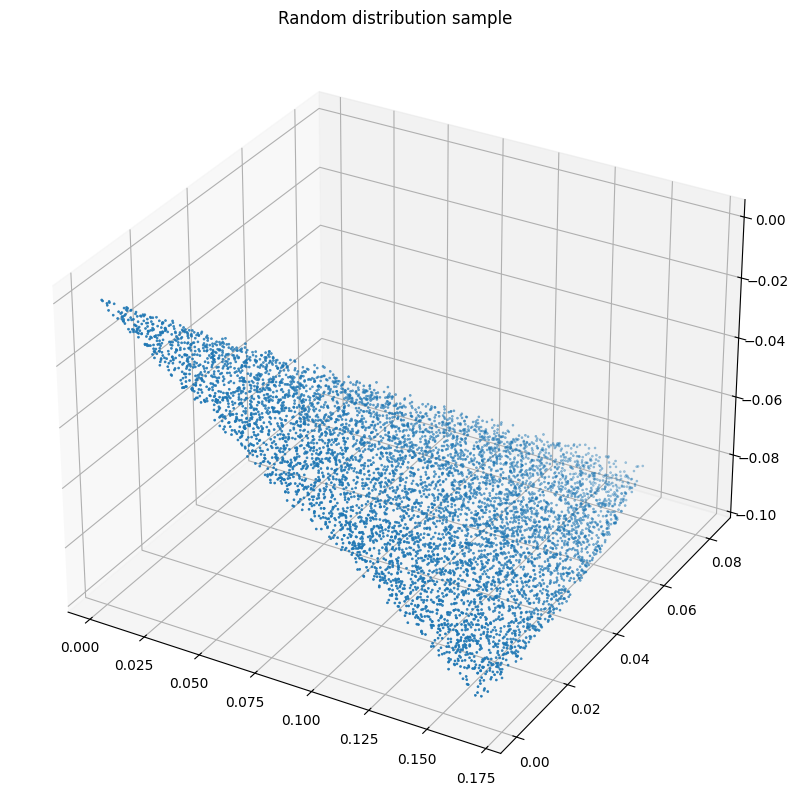

In [28]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(xx, yx, zx, s=2, linewidth=0.5)
plt.title("Random distribution sample")
plt.show()

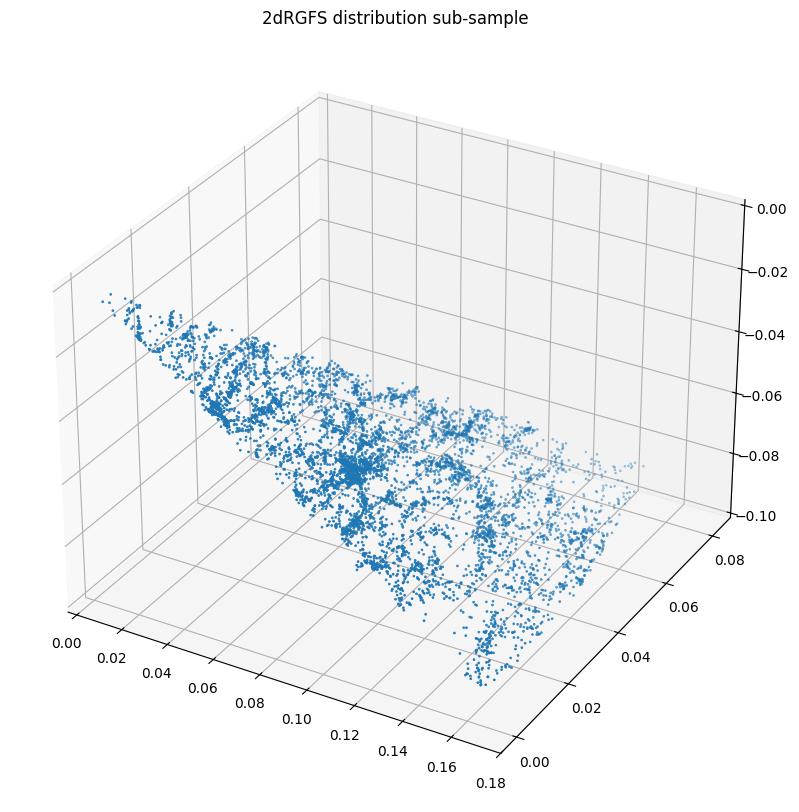

In [29]:
   
X = data[[ 'x', 'y', 'z']]
x = X['x']
y = X['y']
z = X['z']
colors = data[['GROUP_ID']]
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
plt.title("2dRGFS distribution sub-sample")
ax.scatter(x, y, z, s=2, linewidth=0.5)
#ax.scatter(x, y, z, c=colors, cmap='viridis', linewidth=0.5)

In [30]:
dist_min = calculate_distance(limits["min_redsifth"])[0]
dist_max = calculate_distance(limits["max_redsifth"])[0]
dist_max
dr = 0.001
bins = np.arange(0, maxDist, dr)

In [31]:
%%time
# Tenemos que calcular el número de galaxias que hay a cierta distancia, tanto del catálogo real como del
# catálogo aleatorio. Utilizaremos Counter del módulo collections


from collections import Counter


# Definimos la distancia entre 2 puntos 
def euclidean(p1, p2):
    """ compute euclidian distance between two points p1 and p2"""
    if len(p1) != len(p2):
        raise AssertionError("x1 and x2 must be equal")
    suma = sum([(p1[i]-p2[i])**2 for i in range(len(p1))])
    return np.sqrt(suma)


# Generamos vectores con las coordenadas 
p = np.column_stack((np.array(data["x"]),
                     np.array(data["y"]), np.array(data["z"])))

# Generamos bines entre distancia mínima y máximacon pasos de uno en uno
#maxDist = 350
dist_min = calculate_distance(limits["min_redsifth"])[0]
dist_max = calculate_distance(limits["max_redsifth"])[0]

dr = 0.001   # esogemos dr = 1 
bins = np.arange(0, maxDist, dr)  # generamos intérvalos de distancia

digitized = None
digitized_cat = None
distances_lan = None

for i in range(len(p)):
    distances =     np.array([euclidean(p[i], p[j])         for j in range(i+1, len(p))])
    distances_cat = np.array([euclidean(p_cat[i], p_cat[j]) for j in range(i+1, len(p))])
    distances_lan =     np.array([euclidean(p[i], p_cat[j])         for j in range(i+1, len(p))])
    
    digitized = np.digitize(distances, bins)          # colocamos cada distancia a su intérvalo
    digitized_cat = np.digitize(distances_cat, bins)  
    digitized_lan = np.digitize(distances_lan, bins)

    if i == 0:
        DDc = Counter(digitized)       # utilizamos Counter para contar cuantas distancias hay iguales
        RRc = Counter(digitized_cat)
        DRc = Counter(digitized_lan)

    else:
        DDc.update(digitized)          # actualizamos contadores
        RRc.update(digitized_cat)
        DRc.update(digitized_lan)

# Ordenamos DDc i RRc
DDsorted = {k: v for k, v in sorted(DDc.items())}
RRsorted = {k: v for k, v in sorted(RRc.items())}
DRsorted = {k: v for k, v in sorted(DRc.items())}

# Lo pasamos a listas
r = list(DDsorted.keys())     # distancia
DD = list(DDsorted.values())  # número de pares del catálogo real
RR = list(RRsorted.values())  # número de pares del catálogo simulado
DR = list(DRsorted.values())  # número de pares del catálogo simulado

CPU times: total: 6min 20s
Wall time: 6min 25s


In [36]:
print("DD {}".format(len(DDsorted.values())))
print("RR {}".format(len(bins)))
print("RR {}".format(len(r)))
print("RR {}".format(len(DD)))
print("RR {}".format(len(RR)))
print("DR {}".format(len(DR)))

DD 182
RR 191
RR 182
RR 182
RR 188
DR 189


In [41]:
if len(RR) >  len(DD):
    for i in list(range(len(RR)- len(DD))):
        RR.pop()
        #DR.pop()
len(RR)
len(DR)

182

CPU times: total: 31.2 ms
Wall time: 21.7 ms


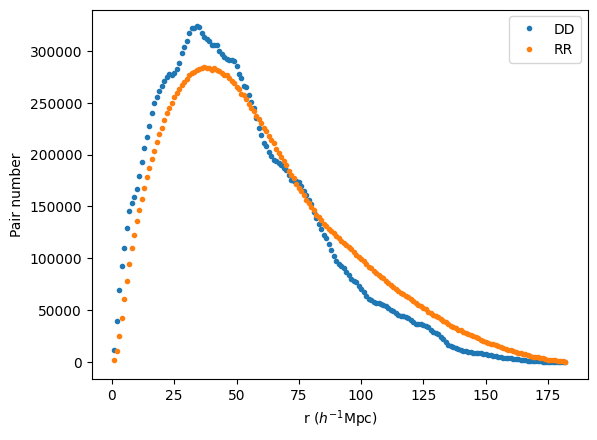

In [42]:
%%time
# Podemos ver que DD y RR son diferentes:
plt.plot(r, DD, '.', label='DD')
plt.plot(r, RR, '.', label='RR')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel('Pair number')
plt.legend()

In [43]:
len(RR)
len(r)

182

In [107]:
bins.shape

(191,)

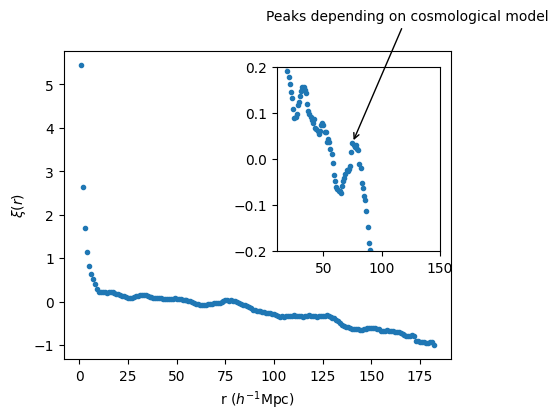

In [45]:
# Calculamos estimador natural
corr = np.array(DD)/np.array(RR) - 1 #Davids and Peebels
#corr = (np.array(DD)-np.array(DR))/np.array(RR) # Hamilton
#corr = (np.array(DD)-2*np.array(DR)+np.array(RR))/np.array(RR) # Landy and Szalay

# Hacemos los gráficos
fig, ax = plt.subplots(figsize=[5, 4])
# Fem el gràfic
ax.plot(r, corr, '.')
ax.set_xlabel("r ($h^{-1}$Mpc)")
ax.set_ylabel(r"$\xi(r)$")

axins = ax.inset_axes([0.55, 0.35, 0.42, 0.60])
axins.plot(r, corr, '.')
# sub region of the original image
x1, x2, y1, y2 = 10, 150, -0.2, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
_ = axins.annotate("Peaks depending on cosmological model",
                   xy=(75, 0.035), xycoords='data',
                   xytext=(0.3, 0.3), textcoords='data',
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
                   )